# Deep Deterministic Policy Gradient (DDPG)
---
This notebook implements a DDPG agent with Unity's Udacity-modified Reacher environment.

### 1. Import the Necessary Packages

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import time   

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below. 

Change the __*visible_environment*__ variable to enable training with (True) or without (False) a visible environment.

The output below indicates the utilization of a cpu or a gpu.

In [2]:
from unityagents import UnityEnvironment
from ddpg_agent import Agent

# set these parameters
visible_environment = False # False for training

if visible_environment == True:
    env = UnityEnvironment(file_name='../unity_environments/Tennis_Linux/Tennis.x86_64')
elif visible_environment == False:
    env = UnityEnvironment(file_name='../unity_environments/Tennis_Linux_NoVis/Tennis.x86_64')   

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)

# number of actions and states
action_size = brain.vector_action_space_size

states = env_info.vector_observations
state_size = states.shape[1]

RANDOM_SEED = 9
BUFFER_SIZE = int(1e6)
BATCH_SIZE = 128 # 64
GAMMA = 0.99
TAU = 1e-3
LR_ACTOR = 1e-3
LR_CRITIC = 1e-3
WEIGHT_DECAY = 0
np.random.seed(0)#
agent = Agent(state_size=state_size, action_size=action_size, random_seed=RANDOM_SEED,
              buffer_size=int(BUFFER_SIZE), batch_size=int(BATCH_SIZE), gamma=GAMMA, tau=TAU, 
              lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY)


device =  cuda:0


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.

Alternatively, **skip** to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

['buffer_size = ', 1000000, 'batch_size = ', 128, 'gamma=', 0.99, 'tau=', 0.001, 'lr_actor= ', 0.001, 'lr_critic=', 0.001, 'weight_decay=', 0]
Episode 1	Average Score: 0.00 	Score: -0.00
Episode 2	Average Score: 0.00 	Score: -0.00
Episode 3	Average Score: 0.00 	Score: -0.00
Episode 4	Average Score: 0.00 	Score: -0.00
Episode 5	Average Score: 0.00 	Score: -0.00
Episode 6	Average Score: 0.00 	Score: -0.00
Episode 7	Average Score: 0.00 	Score: -0.00
Episode 8	Average Score: 0.00 	Score: -0.00
Episode 9	Average Score: 0.01 	Score: 0.05
Episode 10	Average Score: 0.01 	Score: -0.00
Episode 11	Average Score: 0.01 	Score: -0.00
Episode 12	Average Score: 0.01 	Score: -0.00
Episode 13	Average Score: 0.01 	Score: -0.00
Episode 14	Average Score: 0.01 	Score: -0.00
Episode 15	Average Score: 0.01 	Score: -0.00
Episode 16	Average Score: 0.01 	Score: -0.00
Episode 17	Average Score: 0.01 	Score: -0.00
Episode 18	Average Score: 0.01 	Score: -0.00
Episode 19	Average Score: 0.00 	Score: -0.00
Episode 20	A

Episode 179	Average Score: 0.02 	Score: 0.05
Episode 180	Average Score: 0.02 	Score: -0.00
Episode 181	Average Score: 0.02 	Score: 0.10
Episode 182	Average Score: 0.02 	Score: 0.05
Episode 183	Average Score: 0.02 	Score: -0.00
Episode 184	Average Score: 0.02 	Score: -0.00
Episode 185	Average Score: 0.02 	Score: -0.00
Episode 186	Average Score: 0.02 	Score: 0.05
Episode 187	Average Score: 0.02 	Score: -0.00
Episode 188	Average Score: 0.02 	Score: -0.00
Episode 189	Average Score: 0.02 	Score: -0.00
Episode 190	Average Score: 0.02 	Score: 0.05
Episode 191	Average Score: 0.02 	Score: -0.00
Episode 192	Average Score: 0.02 	Score: -0.00
Episode 193	Average Score: 0.03 	Score: 0.05
Episode 194	Average Score: 0.03 	Score: -0.00
Episode 195	Average Score: 0.03 	Score: 0.05
Episode 196	Average Score: 0.03 	Score: -0.00
Episode 197	Average Score: 0.03 	Score: 0.05
Episode 198	Average Score: 0.03 	Score: -0.00
Episode 199	Average Score: 0.03 	Score: -0.00
Episode 200	Average Score: 0.03 	Score: -0

Episode 356	Average Score: 0.01 	Score: 0.05
Episode 357	Average Score: 0.01 	Score: -0.00
Episode 358	Average Score: 0.01 	Score: -0.00
Episode 359	Average Score: 0.01 	Score: 0.05
Episode 360	Average Score: 0.01 	Score: 0.05
Episode 361	Average Score: 0.01 	Score: -0.00
Episode 362	Average Score: 0.01 	Score: -0.00
Episode 363	Average Score: 0.01 	Score: -0.00
Episode 364	Average Score: 0.01 	Score: -0.00
Episode 365	Average Score: 0.01 	Score: 0.05
Episode 366	Average Score: 0.01 	Score: -0.00
Episode 367	Average Score: 0.01 	Score: -0.00
Episode 368	Average Score: 0.01 	Score: 0.05
Episode 369	Average Score: 0.01 	Score: -0.00
Episode 370	Average Score: 0.01 	Score: -0.00
Episode 371	Average Score: 0.01 	Score: -0.00
Episode 372	Average Score: 0.02 	Score: 0.05
Episode 373	Average Score: 0.02 	Score: 0.05
Episode 374	Average Score: 0.02 	Score: -0.00
Episode 375	Average Score: 0.02 	Score: -0.00
Episode 376	Average Score: 0.02 	Score: -0.00
Episode 377	Average Score: 0.02 	Score: 0

Episode 533	Average Score: 0.02 	Score: 0.05
Episode 534	Average Score: 0.02 	Score: 0.05
Episode 535	Average Score: 0.02 	Score: 0.05
Episode 536	Average Score: 0.02 	Score: 0.05
Episode 537	Average Score: 0.02 	Score: -0.00
Episode 538	Average Score: 0.02 	Score: 0.05
Episode 539	Average Score: 0.02 	Score: -0.00
Episode 540	Average Score: 0.02 	Score: -0.00
Episode 541	Average Score: 0.02 	Score: -0.00
Episode 542	Average Score: 0.02 	Score: -0.00
Episode 543	Average Score: 0.02 	Score: -0.00
Episode 544	Average Score: 0.02 	Score: -0.00
Episode 545	Average Score: 0.02 	Score: 0.05
Episode 546	Average Score: 0.03 	Score: 0.05
Episode 547	Average Score: 0.03 	Score: -0.00
Episode 548	Average Score: 0.03 	Score: -0.00
Episode 549	Average Score: 0.03 	Score: -0.00
Episode 550	Average Score: 0.02 	Score: -0.00
Episode 551	Average Score: 0.02 	Score: -0.00
Episode 552	Average Score: 0.02 	Score: -0.00
Episode 553	Average Score: 0.02 	Score: -0.00
Episode 554	Average Score: 0.02 	Score: 0

Episode 711	Average Score: 0.09 	Score: 0.05
Episode 712	Average Score: 0.09 	Score: 0.05
Episode 713	Average Score: 0.09 	Score: 0.05
Episode 714	Average Score: 0.09 	Score: 0.05
Episode 715	Average Score: 0.09 	Score: 0.05
Episode 716	Average Score: 0.09 	Score: 0.15
Episode 717	Average Score: 0.09 	Score: 0.05
Episode 718	Average Score: 0.09 	Score: 0.05
Episode 719	Average Score: 0.09 	Score: 0.10
Episode 720	Average Score: 0.09 	Score: 0.05
Episode 721	Average Score: 0.09 	Score: 0.05
Episode 722	Average Score: 0.10 	Score: 0.05
Episode 723	Average Score: 0.09 	Score: 0.05
Episode 724	Average Score: 0.09 	Score: 0.05
Episode 725	Average Score: 0.09 	Score: 0.10
Episode 726	Average Score: 0.10 	Score: 0.15
Episode 727	Average Score: 0.10 	Score: 0.05
Episode 728	Average Score: 0.10 	Score: 0.05
Episode 729	Average Score: 0.10 	Score: 0.05
Episode 730	Average Score: 0.09 	Score: 0.05
Episode 731	Average Score: 0.10 	Score: 0.10
Episode 732	Average Score: 0.10 	Score: 0.05
Episode 73

Episode 892	Average Score: 0.11 	Score: 0.15
Episode 893	Average Score: 0.11 	Score: 0.25
Episode 894	Average Score: 0.12 	Score: 1.30
Episode 895	Average Score: 0.12 	Score: 0.05
Episode 896	Average Score: 0.13 	Score: 0.15
Episode 897	Average Score: 0.14 	Score: 1.05
Episode 898	Average Score: 0.14 	Score: 1.00
Episode 899	Average Score: 0.15 	Score: 0.20
Episode 900	Average Score: 0.15 	Score: 0.55
Episode 900	Average Score: 0.15
	 Elapsed Time: 199.83 seconds
Episode 901	Average Score: 0.15 	Score: 0.05
Episode 902	Average Score: 0.16 	Score: 0.65
Episode 903	Average Score: 0.16 	Score: 0.75
Episode 904	Average Score: 0.16 	Score: 0.15
Episode 905	Average Score: 0.16 	Score: 0.10
Episode 906	Average Score: 0.17 	Score: 0.55
Episode 907	Average Score: 0.18 	Score: 0.65
Episode 908	Average Score: 0.18 	Score: 0.15
Episode 909	Average Score: 0.18 	Score: 0.70
Episode 910	Average Score: 0.19 	Score: 0.80
Episode 911	Average Score: 0.20 	Score: 0.75
Episode 912	Average Score: 0.20 	Scor

Episode 1070	Average Score: 0.43 	Score: 0.90
Episode 1071	Average Score: 0.43 	Score: 0.05
Episode 1072	Average Score: 0.43 	Score: 0.45
Episode 1073	Average Score: 0.43 	Score: 0.20
Episode 1074	Average Score: 0.43 	Score: 0.05
Episode 1075	Average Score: 0.43 	Score: 0.95
Episode 1076	Average Score: 0.43 	Score: 0.05
Episode 1077	Average Score: 0.44 	Score: 0.25
Episode 1078	Average Score: 0.43 	Score: 0.20
Episode 1079	Average Score: 0.43 	Score: 0.05
Episode 1080	Average Score: 0.42 	Score: 0.05
Episode 1081	Average Score: 0.42 	Score: 0.15
Episode 1082	Average Score: 0.43 	Score: 1.80
Episode 1083	Average Score: 0.44 	Score: 0.15
Episode 1084	Average Score: 0.45 	Score: 1.10
Episode 1085	Average Score: 0.45 	Score: 0.05
Episode 1086	Average Score: 0.45 	Score: 0.45
Episode 1087	Average Score: 0.46 	Score: 0.75
Episode 1088	Average Score: 0.46 	Score: 0.20
Episode 1089	Average Score: 0.46 	Score: 0.95
Episode 1090	Average Score: 0.46 	Score: 0.05
Episode 1091	Average Score: 0.48 	

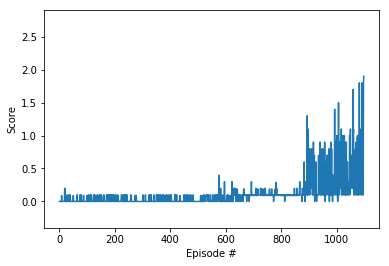

In [3]:
def plot_scores(scores, fig_indicator="normal"):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.ylim((-0.4, 2.9))
    plt.show()
    
    fig_name = "Results/Figure_" + fig_indicator + ".png"
    fig.savefig(fig_name)
    
    np.save("Results/scores_" + fig_indicator + ".npy", scores)
    

def ddpg(n_episodes=2000, max_t=700):
    scores_deque = deque(maxlen=100)
    
    scores = []
    max_score = -np.Inf
    
    tt = time.time()
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        score = np.zeros(num_agents)                          # initialize the score (for each agent)
        for t in range(max_t):
            #time.sleep(0.05)
            actions = agent.act(states)
            #print('actions = ', actions)
            if i_episode < 500:
                actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
                actions = np.clip(actions, -1, 1)
            env_info = env.step(actions)[brain_name]        # send the action to the environment            

            next_states = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done                  # see if episode has finished            
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += rewards
            
            if np.any(dones):
                break 
        
        scores_deque.append(np.max(score))
        scores.append(np.max(score))                

        
        if i_episode == 900:           
            for param_group in agent.actor_optimizer.param_groups:
                param_group['lr'] = 1e-6# 1e-3

            for param_group in agent.critic_optimizer.param_groups:
                param_group['lr'] = 1e-6 #3e-4
           
        
        print('\rEpisode {}\tAverage Score: {:.2f} \tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), np.mean(score)))   
        if i_episode % 100 == 0 or np.mean(scores_deque) >= 0.50:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
            elapsed = time.time() - tt # https://stackoverflow.com/questions/5849800/what-is-the-python-equivalent-of-matlabs-tic-and-toc-functions
            print('\t Elapsed Time: {:.2f}'.format(elapsed), 'seconds')
        if np.mean(scores_deque)>=0.50:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break 
            
    return scores    

print(['buffer_size = ', int(BUFFER_SIZE), 'batch_size = ', int(BATCH_SIZE), 'gamma=', GAMMA, 
       'tau=', TAU, 'lr_actor= ', LR_ACTOR, 'lr_critic=',LR_CRITIC, 'weight_decay=', WEIGHT_DECAY])
tt = time.time()
scores = ddpg(n_episodes=2000)
torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
elapsed = time.time() - tt
plot_scores(scores, fig_indicator="ddpg_normal_soln_final")

### 4. Watch a Smart Agent!

The code below loads the trained weights from file to watch a smart agent. 

To visualize the trained environment,
 - change the __*visible_environment*__ variable to **True** in (**2. Instantiate the Environment and Agent**)
 - restart the kernel, and 
 - **skip** the previous section (**3. Train the Agent with DDPG**).

In [4]:
# load the weights from file
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

for i in range(10):
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations                  # get the current state (for each agent)
    score = np.zeros(num_agents)                          # initialize the score (for each agent)

    for j in range(200):
        actions = agent.act(states)
        env_info = env.step(actions)[brain_name]        # send the action to the environment
        states = env_info.vector_observations
        dones = env_info.local_done                  # see if episode has finished
        
        rewards = env_info.rewards 
        score += rewards
        
        if np.any(dones):
            break                 
    print('score: ', score)

score:  [0.39000001 0.40000001]
score:  [-0.01  0.1 ]
score:  [-0.01  0.1 ]
score:  [-0.01  0.1 ]
score:  [-0.01  0.1 ]
score:  [0.50000001 0.39000001]
score:  [0.50000001 0.50000001]
score:  [0.60000001 0.50000001]
score:  [0.50000001 0.50000001]
score:  [0.1  0.09]


In [5]:
env.close()